In [92]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import PolynomialFeatures
import re
from sqlalchemy import create_engine
import pickle
import warnings
#import requests
#from bs4 import BeautifulSoup
#import time
#from fake_useragent import UserAgent
#import sys, os

warnings.filterwarnings("ignore")
%matplotlib inline

### import data

In [93]:
with open("my_data.pkl", 'rb') as picklefile: 
    raw_q = pickle.load(picklefile).drop_duplicates()
    raw_a = pickle.load(picklefile).drop_duplicates()
    raw_tag = pickle.load(picklefile).drop_duplicates()
    raw_view = pickle.load(picklefile).drop_duplicates()
    raw_badge = pickle.load(picklefile).drop_duplicates()

In [79]:
#raw_q.tail(1)
#raw_q.shape

In [80]:
#raw_view.tail(1)
#raw_view.shape

In [81]:
#raw_tag.tail(1)
#raw_tag.shape

In [82]:
#raw_a.tail(1)
#raw_a.shape

In [83]:
#raw_badge.tail(1)
#raw_badge.shape

### merge data

In [94]:
df = raw_view.merge(raw_q, how = "inner", left_on = "questionid", right_on = "id")
#raw_tag = raw_tag[raw_tag['tag'] == 'python']
df = df.merge(raw_tag, how = "inner", left_on = "questionid", right_on = "id")
keep_cols = ['questionid','owneruserid', 'tag', 'creationdate', 'score', 'views', 'title', 'body']
df = df[keep_cols]
df.columns = ['q_id', 'q_user', 'q_tag', 'q_date', 'q_score', 'q_views', 'q_title', 'q_body']
raw_a.columns = ['a_id', 'a_user', 'a_date', 'q_id', 'a_score', 'a_body']
df = df.merge(raw_a, how = "inner", on = "q_id")

raw_badge = raw_badge.loc[:, ['id', 'rep', 'gold', 'silver', 'bronze']]
raw_badge.rename(index = str, columns = {"id": "user"}, inplace = True)
temp_badge = raw_badge.copy()
temp_badge.columns = 'q_' + np.array(temp_badge.columns)
df = df.merge(temp_badge, how = "inner", on = "q_user")

temp_badge = raw_badge.copy()
temp_badge.columns
temp_badge.columns = 'a_' + np.array(temp_badge.columns)
df = df.merge(temp_badge, how = "inner", on = "a_user")

### cleaning

In [95]:
df['q_views'] = df['q_views'].map(float)

In [96]:
ct = df['q_tag'].value_counts()
ct.sort_values(ascending = False)
top_n = 20
df = df.loc[df['q_tag'].isin(ct.index[:top_n])]

In [97]:
df.tail(1)

,q_id,q_user,q_tag,q_date,q_score,q_views,q_title,q_body,a_id,a_user,...,a_score,a_body,q_rep,q_gold,q_silver,q_bronze,a_rep,a_gold,a_silver,a_bronze
145520,21690171,3015420.0,python,2014-02-10 23:37:26,1,327.0,Matlab Concatenating Row Vectors With A For Loop,<p>Here is what I did:</p>\n\n<pre><code>w = z...,21690402,1586200.0,...,2,<p>You don't need a cell array to concatenate ...,45.0,0.0,0.0,6.0,5906.0,0.0,16.0,46.0


### exploratory

In [89]:
df.tail(1)

,q_id,q_user,q_tag,q_date,q_score,q_views,q_title,q_body,a_id,a_user,...,a_score,a_body,q_rep,q_gold,q_silver,q_bronze,a_rep,a_gold,a_silver,a_bronze


In [7]:
#df.info()

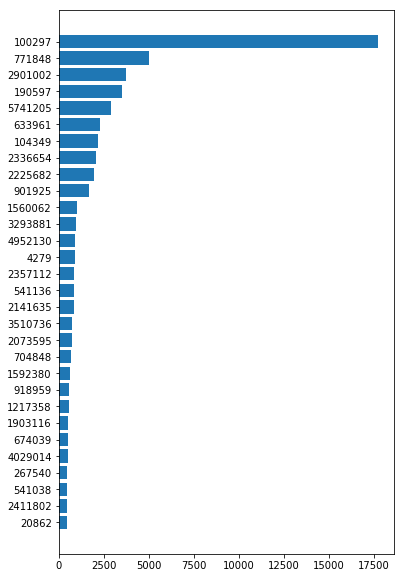

In [63]:
ct = df['a_user'].value_counts()
ct.sort_values(ascending = False)
n_row = 30
y_axis = list(range(n_row, 0, -1))
ytick_li = list(pd.Series(ct.index).map(lambda x: str(int(x))))
plt.figure(figsize = (6, 10))
plt.barh(y_axis, ct.values[:n_row])
plt.yticks(y_axis[:n_row], ytick_li[:n_row])
plt.show()

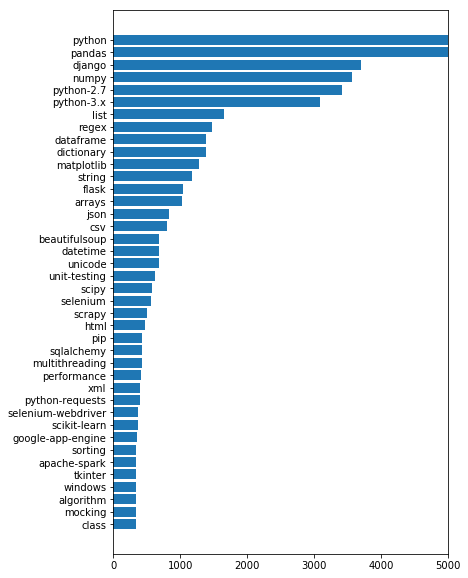

In [76]:
ct = df['q_tag'].value_counts()
ct.sort_values(ascending = False)
n_row = 40
y_axis = list(range(n_row, 0, -1))
ytick_li = list(ct.index)
plt.figure(figsize = (6, 10))
plt.barh(y_axis, ct.values[:n_row])
plt.yticks(y_axis[:n_row], ytick_li[:n_row])
plt.xlim([0, 5000])
plt.show()

### pickle data

In [98]:
with open('cleaned_data.pkl', 'wb') as picklefile:
    pickle.dump(df, picklefile)